# Image handling with torch
- Gray image: (H,W,1) or (H, W)
- RGB image: (H,W,3)
- RGBA image: (H,W,4)
- Batch images: (N, H, W, 3)

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [6]:
# Exercise 1: Load and Inspect Shapes
# Load MNIST and CIFAR-10 from torchvision.datasets.
mnist = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transforms.ToTensor())
mnist_img, mnist_label = mnist[0]
print(mnist_img.shape, mnist_label)

cifar = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transforms.ToTensor())
cifar_img, cifar_label = cifar[0]
print(cifar_img.shape, cifar_label)

torch.Size([1, 28, 28]) 5


100%|██████████| 170M/170M [01:31<00:00, 1.87MB/s] 


torch.Size([3, 32, 32]) 6


In [20]:
# Question: How do you know if MNIST is grayscale and CIFAR-10 is RGB?
"Answer: MNIST dataset has dimensions of (1, H, W) -> first dimension for grayscale"
"Cifar dataset has dimensions of (3, H, W) -> first dimension for RGB"

'Cifar dataset has dimensions of (3, H, W) -> first dimension for RGB'

In [22]:
cifar_np = cifar_img.permute(1,2,0)
cifar_np.shape

torch.Size([32, 32, 3])

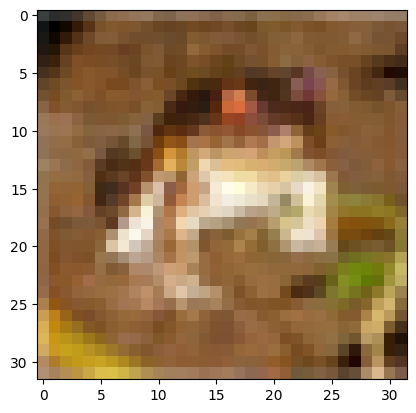

In [23]:
print()
plt.imshow(cifar_np)

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])


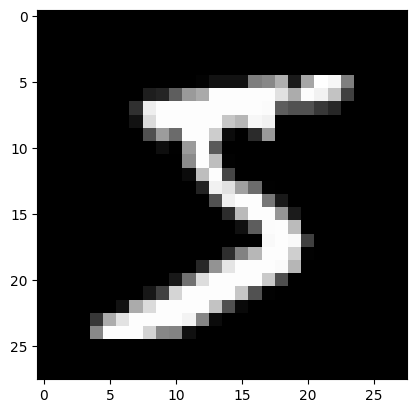

In [32]:
print(mnist_img.shape)
# squeeze
squeezed_mnist_img = mnist_img.squeeze()
print(squeezed_mnist_img.shape)
plt.imshow(squeezed_mnist_img,cmap='gray')
# unsqueeze
unsqueezed_mnist_img = squeezed_mnist_img.unsqueeze(dim=0)
print(unsqueezed_mnist_img.shape)
plt.imshow(unsqueezed_mnist_img.permute(1,2,0),cmap='gray')

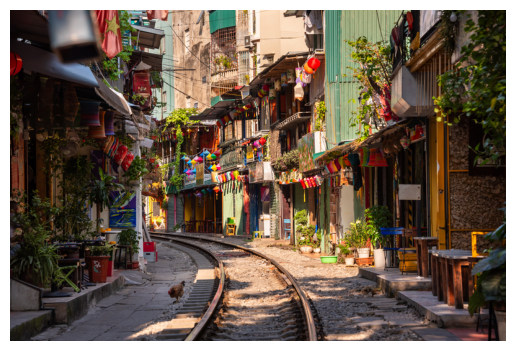

In [37]:
# Reading a random image
vn_img = plt.imread('./vn.jpg')
plt.imshow(vn_img)
plt.axis("off")
plt.show()

## Exercise 4: Batch Visualization
Take a batch of 16 MNIST images (16, 1, 28, 28).

Arrange them in a 4×4 grid using matplotlib.

Hint: torchvision.utils.make_grid or plt.subplot

[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]


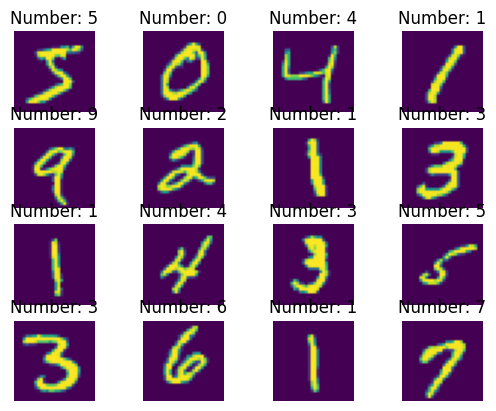

In [65]:
# Using subplt
images = [mnist[i] for i in range(16)]

fig, axes = plt.subplots(4,4)
# fig, axes = plt.subplots(4, 4, figsize=(8, 8))
print(axes)
axes = axes.flatten()  # Use flatten() instead of ravel() for clarity

for i in range(len(images)):
    img, label = images[i]
    axes[i].imshow(img.squeeze())
    axes[i].set_title(f"Number: {label}")
    axes[i].axis("off")

plt.show()

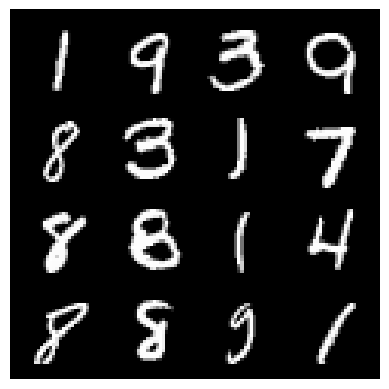

In [81]:
# Using torch
mnist_loader = torch.utils.data.DataLoader(mnist,batch_size=16, shuffle=True)
images, labesl = next(iter(mnist_loader))
grid = torchvision.utils.make_grid(images,nrow=4,padding=2)
plt.imshow(grid.permute(1,2,0))
plt.axis("off")
plt.show()

In [84]:
images.shape

torch.Size([16, 1, 28, 28])